# Перед тем как мы начнем

В двух словах про Python

In [388]:
print("Hello world!")

Hello world!


In [206]:
# Комментарий
# Назначеие переменных

my_var = 5

In [1]:
print("Hello world!")

Hello world!


In [334]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [335]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [336]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [337]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [338]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('HM2.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [339]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [340]:

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [341]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [342]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. 

Обратите внимание, например, что в ManagerID отсутствуют 8 значений.
Почему такое может происходить? 

Еще одно поле с пустыми значениями - DateofTermination. 
Тут все тривиально - люди еще работают, даты увольнения нет.

Обратите внимание на mean по полю MarriedID 
В распределениях Бернулли из нулей и единиц среднее окажется 
синонимично доле единиц в выборке. 


In [343]:
# Все ячейки оказались заполнены 

In [344]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [345]:
# из данных следует, что среднее значение (mean) по involvement - 2,7 и медиана = 3, можно сделать вывод о низком вовлечении сотрудников 
# также низкий уровень по удовлетворенностью балансом работа-личная жизьнь, где среднее значение 2,8, а максимальное 4, что может влиять на низкий involvement 
# при этих значениях, можно увидеть низкий performance rating медиана = 3.

In [346]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [347]:
# на корреляцию имеет смысл смотеть при показателе от 0,7, в данной таблице видим корреляцию между Job Level и Montly Income, что лгично, а также 
# Performance rating и SalaryHike и возможно она стоит внимания, по остальным показателям корреляция незначительная, либо не релевантная 

In [348]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['MaritalStatus'].nunique()

3

In [349]:
# Как мы с вами только что убедились, есть только два гендера

In [350]:
# Теперь глянем, что это за гендеры?
df_hr['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [351]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

'\n\nВ любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,\nесли у нас всего два класса, один из которых 0, а второй 1. \n\nТогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, \nто есть их же количество. \n\nРазница между работой Sum() и Count() важный момент, запомните это. \n\n'

In [352]:
df_hr['EmployeeCount'].count()

1470

In [353]:
df_hr['MonthlyRate'].sum()

21040262

In [354]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [355]:
df_hr['MonthlyIncome'].sum()

9559309

In [356]:
# Montly Rate превышает Mothly Income, это говорит о том, что компания закладывает бОльший бюджет, но по факту не расходует его в полном объеме, этто может быть связано с тем, что сотрудники, либо увольнаяютсяи не расходуется заложенный бюджет или может не выполняют таргет, в связи с чем, им не выплачивется бонус (что подтвержает низкий performace rating)

In [357]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [358]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [359]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

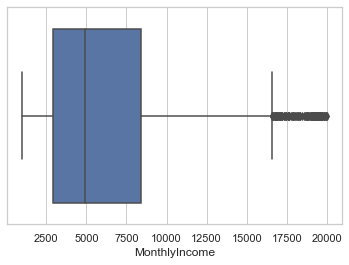

In [360]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [361]:
# Видим, что распределение явно смещенное, все выбросы справа
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей
# Видим, что 99% процентов всех значений лежат в области ~1000 (в левую сторону больше нет выбросов) до ~17000. есть выбросы в правой части, сотрудники с максимально высоким доходом, скорее члены руководящей команды и т.д.

Text(0, 0.5, 'Amount of employees')

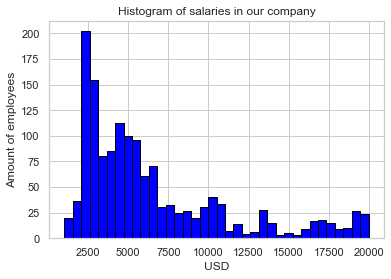

In [362]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [363]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [364]:
import numpy as np

In [365]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [366]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [367]:
# Обращает внимание что медиана ниже среднего значения где-то на 7000. 
# О чем это говорит? 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [368]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [369]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [370]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [371]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [372]:
# Выделим в отдельные массивы сотрудников с разными GenderID
df_hr_g1 = df_hr[df_hr['JobSatisfaction'] == 1]
df_hr_g2 = df_hr[df_hr['JobSatisfaction'] == 2]
df_hr_g3 = df_hr[df_hr['JobSatisfaction'] == 3]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7


In [373]:
df_hr_g1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,32,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,1,2038,4,Male,78,3,1,Research Scientist,1,Single,2439,11288,1,Y,No,14,3,4,80,0,4,4,3,4,2,1,2
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7


In [374]:
df_hr_g2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,Y,No,13,3,3,80,1,6,5,3,5,4,0,3
16,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,1,Male,80,4,1,Research Scientist,2,Divorced,3298,15053,0,Y,Yes,12,3,4,80,2,7,5,2,6,2,0,5
22,34,No,Travel_Rarely,419,Research & Development,7,4,Life Sciences,1,28,1,Female,53,3,3,Research Director,2,Single,11994,21293,0,Y,No,11,3,3,80,0,13,4,3,12,6,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,3,Male,57,2,2,Sales Executive,2,Divorced,8938,12227,2,Y,No,11,3,3,80,1,14,5,3,5,4,0,4
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [375]:
df_hr_g3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,40,No,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,1,2048,3,Male,52,2,1,Research Scientist,3,Single,2809,2725,2,Y,No,14,3,4,80,0,8,2,3,2,2,2,2
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,3,Male,80,3,2,Healthcare Representative,3,Married,5689,24594,1,Y,Yes,14,3,4,80,2,10,2,4,10,2,0,2
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0


In [376]:
print("Count of JobSatisfaction = 1\
 is {} and for JobSatisfaction = 2 is {} and for JobSatisfaction = 3 {} ".format(len(df_hr_g1), len(df_hr_g2),
                                           len(df_hr_g3)))

Count of JobSatisfaction = 1 is 289 and for JobSatisfaction = 2 is 280 and for JobSatisfaction = 3 442 


In [377]:
print("Median of MonthlyIncome for JobSatisfaction = 1\
is {} and for JobSatisfaction = 2 is {} and for JobSatisfaction = 3 is {} ".format(np.median(df_hr_g1.MonthlyIncome), np.median(df_hr_g2.MonthlyIncome),
                                           np.median(df_hr_g3.MonthlyIncome)))

Median of MonthlyIncome for JobSatisfaction = 1is 4968.0 and for JobSatisfaction = 2 is 4853.0 and for JobSatisfaction = 3 is 4788.5 


<AxesSubplot:xlabel='MonthlyIncome'>

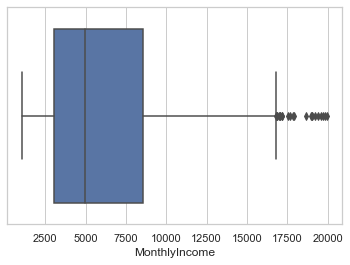

In [378]:
sns.boxplot(x=df_hr_g1["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

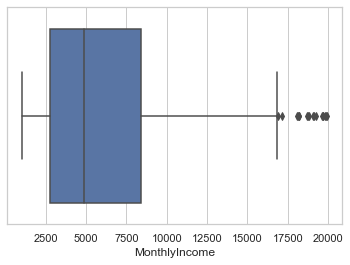

In [379]:
sns.boxplot(x=df_hr_g2["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

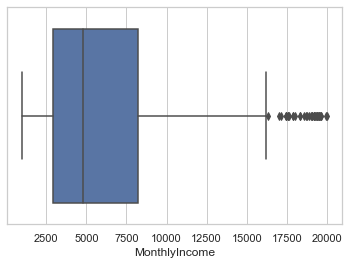

In [380]:
sns.boxplot(x=df_hr_g3["MonthlyIncome"])

Text(0, 0.5, 'Amount of employees')

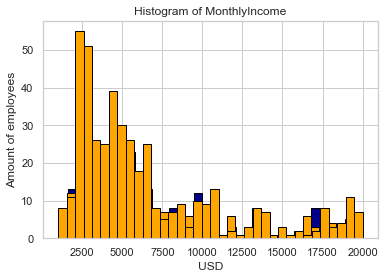

In [381]:
plt.hist(df_hr_g1['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g2['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))


plt.hist(df_hr_g3['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of MonthlyIncome')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [382]:
# Видим, что хотя количество объектов и отличаются (высота столбиков),
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [383]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [384]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal


In [385]:
"""

У нас получилось 8 человек с ультравысокой зарплатой. 
Вероятно мы нашли лидеров бизнеса или людей, на которых компания делает ставку

Обратите внимание на их оценки перформанса (PerformanceScore), 
оценку уровня вовлеченности (EngagementSurvey). 

Какие предварительные выводы/гипотезы можно сделать? 


"""

'\n\nУ нас получилось 8 человек с ультравысокой зарплатой. \nВероятно мы нашли лидеров бизнеса или людей, на которых компания делает ставку\n\nОбратите внимание на их оценки перформанса (PerformanceScore), \nоценку уровня вовлеченности (EngagementSurvey). \n\nКакие предварительные выводы/гипотезы можно сделать? \n\n\n'

## Оценка абсентеизма - количества отсутствий на рабочем месте

Каких-то заментых возмущений не наблюдается, распределение плюс-минус случайное. 

Из метода .describe() выше нам известно, что 75-перцентиль количества отсутствий находится на уровне 15. 

Давайте также посчитаем где лежит 90-й перцентиль. 



In [386]:
df_hr.Absences.quantile(q=0.9)

AttributeError: 'DataFrame' object has no attribute 'Absences'

Это означает, что 90% сотрудников в выборке имеют менее 18 отсутствий.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 18 и более отсутствий. 

In [387]:
df_hr_ab = df_hr[df_hr['Absences'] > 17]
df_hr_ab

KeyError: 'Absences'

Получили 38 человек. У всех у них по 19 или 20 отсутствий. 

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 311 сотрудниках, часть из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках
2. Зарплаты между гендерами распределены скорее всего равномерно, явных искажений не наблюдается
3. Отсутствия распределены предположительно случайно от 0 до 20, ни у кого нет более 20 отсутствий
4. У нас в выборке 38 человек с 18 отсутствиями или более, это больше чем у 90% персонала. 

# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 